In [1]:
#Decision Tree: Gini

#Check working direcotry
import os

path = os.getcwd()

print(path)

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier 
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from IPython.display import Image
import pydotplus

C:\Users\Tanikan


In [3]:
# load dataset
iris = pd.read_csv("Iris.csv")

#Display all results in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

iris.head()
iris.shape
iris.describe()
iris.isnull().any() # False means no missing values
iris.info() #150 entries (rows)
iris.species.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [6]:
# To divide the data into “attributes” (independent vatiables) and “labels” (target or dependent variable)
X = iris.drop('species', axis='columns') #drop column species
y = iris['species']

X.head()
y.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Display all results in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

X_train.shape
X_test.shape

(105, 4)

(45, 4)

In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini') #gini is a default
#clf = DecisionTreeClassifier(criterion='entropy') 

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#plug in all x to find y
clf.predict([[5.1,3.5,1.4,0.2]])

#Predict the response for test dataset
y_pred = clf.predict(X_test)

y_pred

array(['setosa'], dtype=object)

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [9]:
X_train.columns
clf.feature_importances_ #which independent variable is higher important

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

array([0.        , 0.04300928, 0.40406279, 0.55292793])

In [10]:
y_train.value_counts() #frequency of y train

virginica     39
setosa        34
versicolor    32
Name: species, dtype: int64

In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [12]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

print('Accurary', (16+17+11)/(16+17+11+1))

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

Accurary 0.9777777777777777


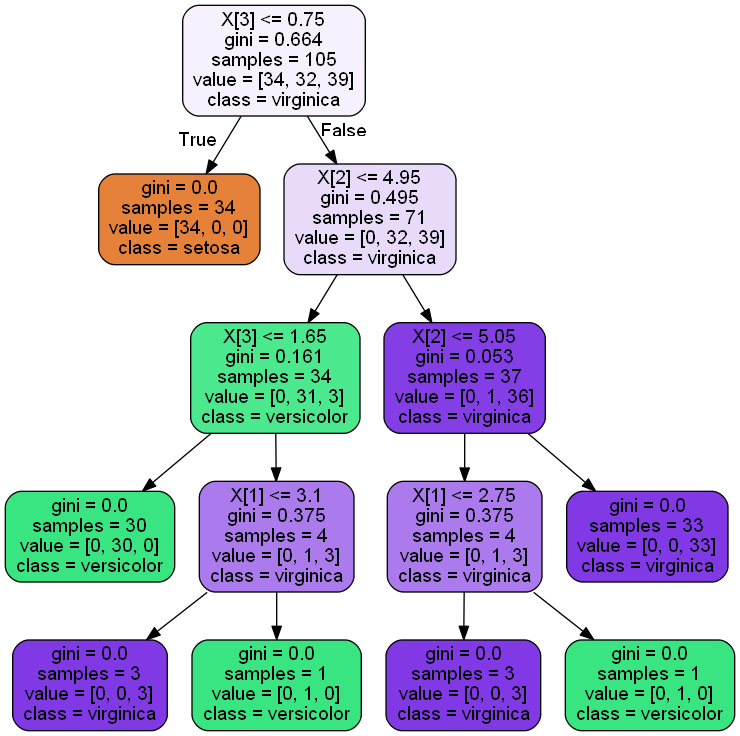

virginica     39
setosa        34
versicolor    32
Name: species, dtype: int64

In [13]:
#in prompt 
#pip install --upgrade scikit-learn==0.20.3

from io import StringIO

import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

#create dot data
dot_data = export_graphviz(clf,rounded=True,filled=True,class_names=['setosa','versicolor','virginica'])
#draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())
y_train.value_counts()

#X[0] = sepal_length, X[1] = sepal_width, [X2] = petal_length, [X3] = petal_width

In [14]:
#Prine Decision Tree Diagram

graph.write_png('DTiris.png')

True

In [15]:
#Check the difference between the actual value and predicted value
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
b
df1 = df.head(20)
print(df1)

         Actual   Predicted
114   virginica   virginica
62   versicolor  versicolor
33       setosa      setosa
107   virginica   virginica
7        setosa      setosa
100   virginica   virginica
40       setosa      setosa
86   versicolor  versicolor
76   versicolor  versicolor
71   versicolor  versicolor
134   virginica   virginica
51   versicolor  versicolor
73   versicolor  versicolor
54   versicolor  versicolor
63   versicolor  versicolor
37       setosa      setosa
78   versicolor  versicolor
90   versicolor  versicolor
45       setosa      setosa
16       setosa      setosa
